<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

_Authors: Matt Brems (DC)_

---

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [1]:
import urllib

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

import pandas as pd
data = pd.read_csv("./datasets/housing.data", header=None, names=names, delim_whitespace=True)


import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

NOX = data['NOX'].values
AGE = data['AGE'].values

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [2]:
age_mean = np.mean(AGE)
age_std = np.std(AGE)
print(age_mean)
print(age_std)

68.5749011858
28.1210325702


In [3]:
age_se = np.std(AGE, ddof=1)/np.sqrt(len(data))
age_se

1.2513695252583041

In [4]:
stats.sem(AGE, ddof=1)

1.2513695252583041

### 2. Generate a 90%, 95%, and 99% confidence interval for the mean value of `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [5]:
from scipy.stats import t

In [16]:
t_interval90 = t.interval(0.9, len(AGE)-1, age_mean, age_se)
t_interval95 = t.interval(0.95, len(AGE)-1, age_mean, age_se)
t_interval99 = t.interval(0.99, len(AGE)-1, age_mean, age_se)

In [31]:
print('I\'am 90% sure that the true mean value for ''AGE'' is between ' + str(t_interval90[0]) + ' and ' + str(t_interval90[1]) + ' years')
print('I\'am 95% sure that the true mean value for ''AGE'' is between ' + str(t_interval95[0]) + ' and ' + str(t_interval95[1]) + ' years')
print('I\'am 99% sure that the true mean value for ''AGE'' is between ' + str(t_interval99[0]) + ' and ' + str(t_interval99[1]) + ' years')

I'am 90% sure that the true mean value for AGE is between 66.512798667 and 70.6370037045 years
I'am 95% sure that the true mean value for AGE is between 66.1163697185 and 71.033432653 years
I'am 99% sure that the true mean value for AGE is between 65.3393604183 and 71.8104419532 years


In [7]:
# testing
t_interval_90 = t.interval(0.9,
                           len(AGE)-1,
                           loc=np.mean(AGE),
                           scale=np.std(AGE, ddof = 1)/(len(AGE))**0.5)
t_interval_90

(66.512798667041864, 70.637003704499648)

### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.

(array([  14.,   31.,   29.,   42.,   32.,   38.,   39.,   42.,   71.,  168.]),
 array([   2.9 ,   12.61,   22.32,   32.03,   41.74,   51.45,   61.16,
          70.87,   80.58,   90.29,  100.  ]),
 <a list of 10 Patch objects>)

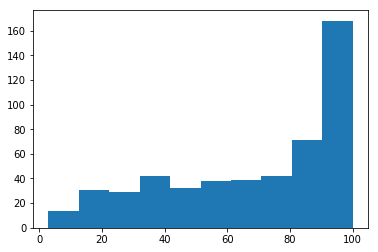

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data['AGE'])

# This is not a normal distribution of the 

### 4. For variable `NOX`, generate a 95% confidence interval for the mean and interpret it.

In [35]:
nox_mean = np.mean(data['NOX'])
nox_std = np.std(data['NOX'])
nox_se = stats.sem(data['NOX'], ddof=1)
print(nox_mean)
print(nox_std)
print(nox_se)

0.5546950592885372
0.11576311540656153
0.00515139102403


In [41]:
nox_interval90 = t.interval(0.9, len(NOX) - 1, nox_mean, nox_se)
nox_interval95 = t.interval(0.95, len(NOX) - 1, nox_mean, nox_se)
nox_interval99 = t.interval(0.99, len(NOX) - 1, nox_mean, nox_se)

print('I\'am 90% sure that the true mean value for ''NOX'' is between ' + str(nox_interval90[0]) + ' and ' + str(nox_interval90[1]) + ' nox')
print('I\'am 95% sure that the true mean value for ''NOX'' is between ' + str(nox_interval95[0]) + ' and ' + str(nox_interval95[1]) + ' nox')
print('I\'am 99% sure that the true mean value for ''NOX'' is between ' + str(nox_interval99[0]) + ' and ' + str(nox_interval99[1]) + ' nox')

I'am 90% sure that the true mean value for NOX is between 0.546206202727 and 0.56318391585 nox
I'am 95% sure that the true mean value for NOX is between 0.544574262292 and 0.564815856285 nox
I'am 99% sure that the true mean value for NOX is between 0.541375623797 and 0.56801449478 nox


### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha, the confidence threshold (Let alpha = 0.05)
3. Calculate point estimate, i.e. sample mean
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [43]:
# A:
# The null hypothesis is that the variable nox the mean is equal to the median.
alpha = 0.05
nox_median = np.median(NOX)
nox_tstat = (nox_mean - nox_median)/ nox_se
nox_p = t.sf(np.abs(nox_tstat), len(NOX)) * 2




In [64]:
print('the median for the nox is ' + str(nox_median))
print('the tstatistic for nox is ' + str(nox_tstat))
print('the pvalue for nox is ' + str(nox_p) + '\n')

print('the p value is less than the alpha so we can reject the null hypothesis')

the median for the nox is 0.538
the tstatistic for nox is 3.24088371678
the pvalue for nox is 0.00127005273618

the p value is less than the alpha so we can reject the null hypothesis


### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

In [11]:
# A: The larger the t-stat the smaller the p value

### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [70]:
# A:
# H0: the the mean != the median for NOX
# HA: the mean is >= the median for NOX

alpha1 = 0.05
print(nox_median)
print(nox_mean)
nox_tstat = (nox_mean - nox_median)/ nox_se
p = t.sf(np.abs(nox_tstat), len(NOX) * 2)
p
# we reject the null hypothesis because the p values shows that the null hypothesis has less than a 5% chance of occuring.So the NOX value is 
# greater than the median NOX value.

0.538
0.5546950592885372


0.00061522964463428195

### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?

In [13]:
# A:Exercise 5 is a one side tail test whil exercise 7 is a two sided tail test.